## Analyse du Pokédex

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

Scrapédex_final=pd.read_pickle(r'C:\Users\Yanis\Documents\Projet Pokédex\Data\Scrapédex_final.pkl')
sp=Scrapédex_final.copy()

sp.index_col=0

## Introduction

Le but de cette analyse est d'arriver à identifier des éléments intéressants pour la stratégie dans les jeux pokémon. Pour cela on commencera par analyser la distribution des types. Nous nous intéresserons ensuite aux valeurs extremes chez les pokémon que représentent les pokémon légendaires. Enfin on pourra identifier des éléments concernant la stratégie à partir des types, des sensibilités et des bases stats.

La base se présente tel quel:

In [29]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 1 to 890
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Nom                               890 non-null    object 
 1   Nom anglais                       890 non-null    object 
 2   Types                             890 non-null    object 
 3   Catégorie                         890 non-null    object 
 4   Taille                            890 non-null    float64
 5   Poids                             890 non-null    float64
 6   Talents                           890 non-null    object 
 7   Groupe Oeuf                       890 non-null    object 
 8   Couleur                           890 non-null    object 
 9   Taux de capture                   890 non-null    float64
 10  PV_base                           890 non-null    float64
 11  Attaque_base                      890 non-null    float64
 12  Défense_

# 1) Des pokémons et des types

Dans cette première partie nous allons observer comment sont distribués les types de pokémon. Nous verrons quels sont les types les plus présents et les moins présents, nous verrons ensuite que l'on peut différencier des types plus combinatoires et des types plus excluant.

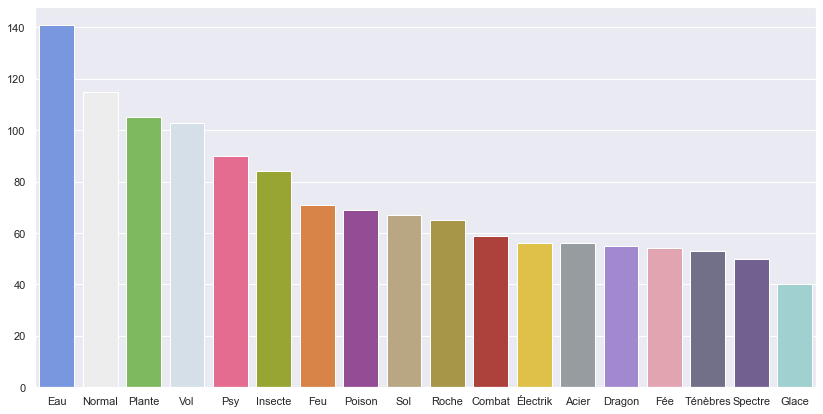

In [8]:
Types=sp['Type1'].value_counts()+sp['Type2'].value_counts()
Types=Types.sort_values(ascending=False)

sns.set(rc={'figure.figsize':(14,7)})
sns.barplot(Types.index, Types.values,palette=pkmn_type_colors)

In [173]:
print(Types)

Eau         141
Normal      115
Plante      105
Vol         103
Psy          90
Insecte      84
Feu          71
Poison       69
Sol          67
Roche        65
Combat       59
Électrik     56
Acier        56
Dragon       55
Fée          54
Ténèbres     53
Spectre      50
Glace        40
dtype: int64


On a 18 types de pokémons différents, mais attention leur répartition n'est pas la même !

Les pokémons Eau sont les plus présents avec 141 pokemons, suivis par les pokémons normals (115) puis les pokémons plante et vol (105 et 103). Dans le bas du tableau on retrouve les pokémons glace (40), spectre (50) et ténèbres et fée (53 et 54). Avec de si gros écarts on peut déjà clairement dire que les types ne sont pas distibués uniformément

Mais attention il faut prendre en compte que le résultat présenté montre une distribution incluant les doubles types, (ainsi si un pokémon est eau et plante il compte pour les 2 catégories, on se demande ensuite alors ce qu'il en est pour les pokémons qui n'ont qu'un seul type.

Déjà observons le nombre de pokémons qui n'ont qu'un seul type et ceux qui en ont deux.

In [4]:
sp['A 2 types ?'].value_counts()

0.0    447
1.0    443
Name: A 2 types ?, dtype: int64

On a presque autent de pokémon avec 2 types que de pokémon avec 1 type 

447 vs 443


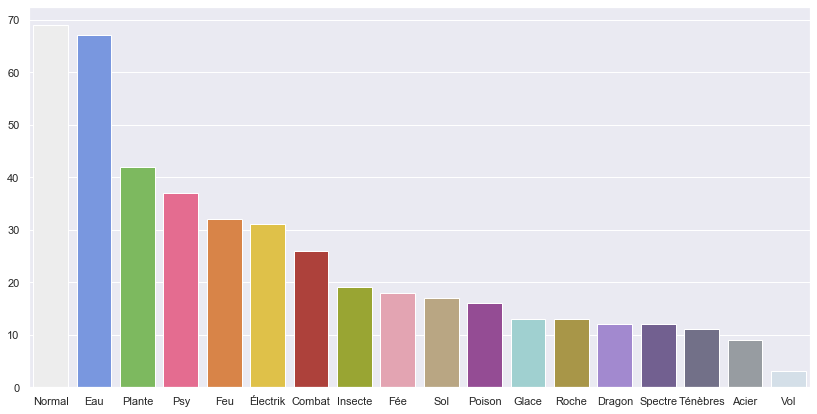

In [10]:
mask_types=sp["A 2 types ?"]==0
sp_UnType=sp[mask_types]
Type=sp_UnType["Types"].value_counts()
Type=Type.sort_values(ascending=False)

sns.set(rc={'figure.figsize':(14,7)})
sns.barplot(Type.index, Type.values,palette=pkmn_type_colors)

In [11]:
print(Type)

Normal      69
Eau         67
Plante      42
Psy         37
Feu         32
Électrik    31
Combat      26
Insecte     19
Fée         18
Sol         17
Poison      16
Glace       13
Roche       13
Dragon      12
Spectre     12
Ténèbres    11
Acier        9
Vol          3
Name: Types, dtype: int64


Quand on regarde les pokémons qui n'ont qu'un seul type on remarque que le haut du classement ne change pas, les pokémons eau, normal et plante sont toujours plus présents que les autres, cepandant en observant le bas du tableau on se rend compte que le type vol est bon dernier avec seulement 3 pokémons (de type uniquement vol donc) ce qui contraste beaucoup avec le fait qu'on ai au total 103 pokémons vol.

Cela pourrait nous indiquer qu'il y a des types plus sensibles à être des doubles-types que d'autres, le type vol serait par exemple plus considéré comme un type secondaire (ou du moins un type qui a plus de chance de se retrouver en complément d'un autre type ), c'est assez impressionnant de constater que sur 103 pokémons vol (donc majoritairement des pokémons qui ressembles a des oiseaux pour grossir le trait) seul 3 on uniquement ce type

Pour essayer de visualiser ces "types combinatoires" on vas soustraire le nombre de pokémons qui n'ont qu'un seul type au total du nombre de type

In [12]:
Type_secon=(sp['Type1'].value_counts()+sp['Type2'].value_counts())-(sp_UnType["Types"].value_counts())
Type_secon=Type_secon.sort_values(ascending=False)
Type_secon

Vol         100
Eau          74
Insecte      65
Plante       63
Psy          53
Poison       53
Roche        52
Sol          50
Acier        47
Normal       46
Dragon       43
Ténèbres     42
Feu          39
Spectre      38
Fée          36
Combat       33
Glace        27
Électrik     25
dtype: int64

Au final on peut discerner des types plus combinatoires, c'est-à-dire qu'ils s'associent plus facilement avec d'autres types.

C'est le cas des pokémons du types Vol, Eau, Insectes et Plantes par exemple, ces types se retrouvent plus souvent en combinaison avec d'autres types, ce qui explique au final leur si grande part dans le total des types.


Le type normal quant à lui est presque autant présent en tant que type unique qu'en tant que type secondaire, c'est ce mélange qui le place dans le top des types.
Dans le bas cette fois on retrouve les pokémon électrik, glace et combat par exemple, On pourrait interpréter en disant que ces types sont plutôt excluant, ils s'associent moins avec d'autres types que les autres types.

### Conclusion:  
La distribution simple des types de pokémons montre qu'il a de grandes disparités, des types sont beaucoup plus représentés que d'autres, on est loin d'une distribution uniforme.


En regardant de plus près on peut essayer de décomposer cette distribution en distinguant des types plutôt combinatoires, qui s'associent plus aisément avec les autres types, et des types plutôt excluant, qui à l'inverse s'associent moins avec les autres.


les types plutôt combinatoires grace aux melanges qu'ils entrainent se retrouvent au final plus haut dans le classement que les autres types ce qui explique en partie ce classement, les types plus excluant (notamment le type glace) restent assez minoritaire du fait du faible nombre de combinaisons entrainées ( attention il faut relativiser, les types plutôt excluant ne se retrouvent pas forcément derniers mais ont tout de même toujours une moins bonne place que les types combinatoires)


En interprétant un peu on pourrait dire que les types combinatoires sont des types représentant plutôt l'espece du pokémon: vole pour les oiseaux, eau pour les animaux sous-marins, plantes pour les végétaux, les arbres, et insecte pour ... les insectes.

les types plutôt excluant eux correspondent plus à des attributs, indicant un pouvoir ou un milieu de vie, par exemple glace pour des pokémons vivant dans les milieux froids, electrick pour des pokémons générant de l'électricité, combat pour des pokémons utilisant des attaques de type art martiaux ...


On a donc des types d'espèce et des types d'attribut. Mais attention la différence entre les deux n'est pas forcément évidente, même si on peut dire que certains types sont des types d'espèces de façon générale ils comportent aussi peut-être en eux une part d'attribut (exemple un pokémon eau peut être un pokémon d'une espèce marine, mais il peut être aussi par exemple un mammifère qui crache de l'eau, eau est alors un attribut)

Pour conclure on peut dire que les types comportent deux composantes, l'espèce et l'attribut. Chez certains types ces deux composantes sont bien distinctes, vol et insecte représentant vraiment des espèces la plupart du temps et electrick et glaces eux ne representent à proprement dit que des attributs. La différenciation entre les deux n'est cependant pas toujours possible comme on le voit avec le type eau.

# 2) Valeur extreme je te choisis !

Un des problemes majeur que nous rencontrons souvent dans les bases de donnée est le probleme des valeurs extremes. Le pokédex ne fait pas exception et ils nous faut alors les identifier. Mais ici rien de plus simple  ...   ce sont les pokémons légendaire !

En effet ces pokémons peuvent etre a juste titre considérer comme des valeurs extremes, ils sont extremes en taille, en poids et en "puissance" (la puissance etant mesurer a partir de la moyenne des bases statistiques).

avec 1 pour un pokémons légendaire et 0 pour un non-légendaire on trouve 

0.0    811
1.0     79
Name: Légendaire, dtype: int64

On a 79 pokémons légendaires sur 890 pokémons. On effectue une comparaison entre ces 79 pokémons et les 811 autres sur le poids, la taille et la moyenne des statistiques de bases pour montrer qu'ils sont bien des outliers


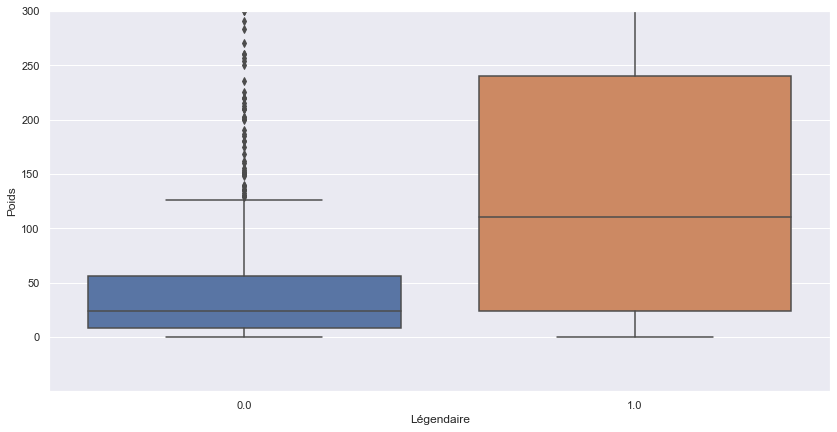

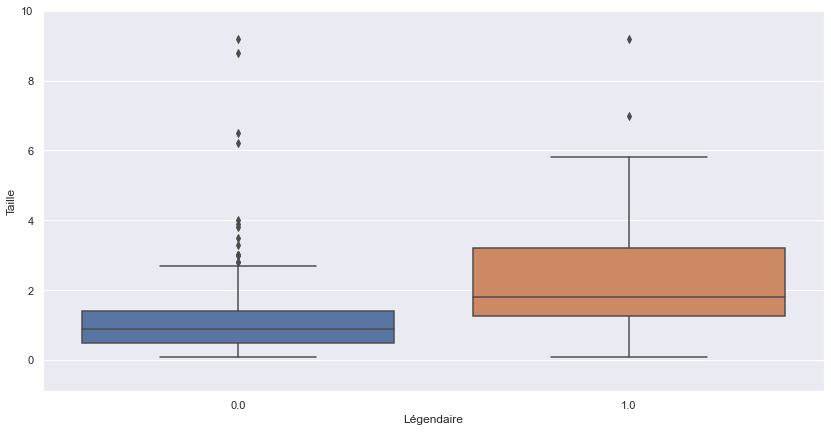

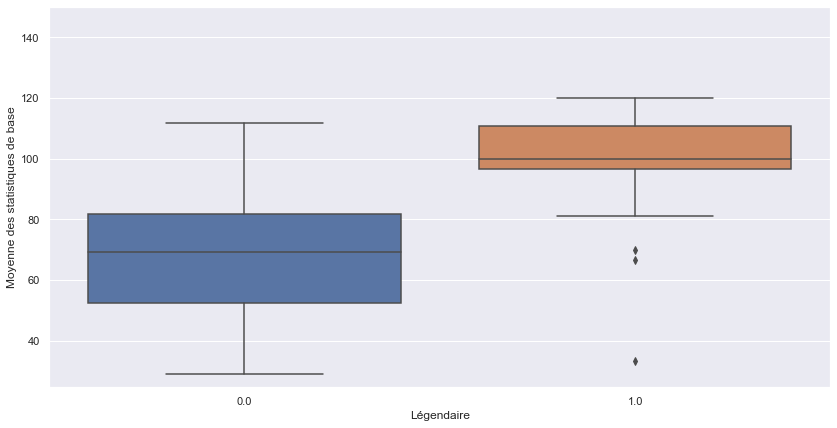

In [13]:
spstatleg=sp[["Poids","Taille","Moyenne des statistiques de base","Légendaire"]]

leg=sp['Légendaire'].value_counts()


print("avec 1 pour un pokémons légendaire et 0 pour un non-légendaire on trouve \n")
print(leg)

print("\nOn a 79 pokémons légendaires sur 890 pokémons. On effectue une comparaison entre ces 79 pokémons et les 811 autres sur le poids, la taille et la moyenne des statistiques de bases pour montrer qu'ils sont bien des outliers")
sns.set_style("darkgrid")

sns.boxplot(y="Poids" , x="Légendaire", data=spstatleg)
plt.xlim(None, None)
plt.ylim(None, 300)
plt.show()

sns.boxplot(y="Taille" , x="Légendaire", data=spstatleg)
plt.xlim(None, None)
plt.ylim(None, 10)
plt.show()

sns.boxplot(y="Moyenne des statistiques de base" , x="Légendaire", data=spstatleg)
plt.xlim(None, None)
plt.ylim(None, 150)
plt.show()


Plus précisement on trouve les résultats suivant:

In [14]:
sptest=sp[["Poids","Taille","Moyenne des statistiques de base","Légendaire"]]
maskleg=(sptest["Légendaire"]==1)
maskpasleg=(sptest["Légendaire"]==0)
spleg=sptest[maskleg]    
sppasleg=sptest[maskpasleg]

print("Pour les pokémons légendaires : \n")
spleg.describe()

Pour les pokémons légendaires : 



,Poids,Taille,Moyenne des statistiques de base,Légendaire
count,79.000000,79.000000,79.000000,79.0
mean,203.874684,2.497468,99.907595,1.0
std,258.074357,2.645992,11.959656,0.0
min,0.100000,0.100000,33.330000,1.0
25%,23.600000,1.250000,96.670000,1.0
50%,110.000000,1.800000,100.000000,1.0
75%,240.000000,3.200000,110.835000,1.0
max,999.900000,20.000000,120.000000,1.0


In [177]:
print("Pour les pokémons non-légendaires : \n")
sppasleg.describe()

Pour les pokémons non-légendaires : 



,Taille,Poids,Taux de capture,PV_base,Attaque_base,Défense_base,Attaque_spé_base,Défense_spé_base,Vitesse_base,Spécial_base,...,Roche_sensi,Spectre_sensi,Dragon_sensi,Ténèbres_sensi,Acier_sensi,Fée_sensi,Somme des sensibilité,Légendaire,Génération,Constante
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.0,811.000000,811.0
mean,1.053761,49.258200,108.516646,66.235512,73.508015,68.884094,65.779285,66.604192,62.818742,65.779285,...,1.254316,0.966091,0.967941,1.043157,0.981813,1.067818,19.005549,0.0,4.038224,1.0
std,0.907306,80.916774,75.961447,24.558924,28.236495,28.068151,26.459461,24.829143,26.643517,26.459461,...,0.701396,0.532079,0.346350,0.403862,0.490552,0.514176,1.952475,0.0,2.237121,0.0
min,0.100000,0.100000,3.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,10.000000,...,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,10.000000,0.0,1.000000,1.0
25%,0.500000,8.350000,45.000000,50.000000,52.500000,50.000000,45.000000,50.000000,43.000000,45.000000,...,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,18.000000,0.0,2.000000,1.0
50%,0.900000,24.200000,75.000000,65.000000,70.000000,65.000000,60.000000,65.000000,60.000000,60.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.500000,0.0,4.000000,1.0
75%,1.400000,55.900000,190.000000,77.000000,92.000000,85.000000,85.000000,80.000000,80.000000,85.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,0.0,6.000000,1.0
max,14.500000,920.000000,255.000000,255.000000,165.000000,230.000000,150.000000,230.000000,160.000000,150.000000,...,4.000000,2.000000,2.000000,2.000000,4.000000,4.000000,26.000000,0.0,8.000000,1.0


On a conformément aux box-plot une moyenne des statistiques de bases presque 50% plus élever pour les pokémons légendaire que pour les autres, les légendaires sont également en moyenne presque 4 fois plus lourd  et 2,3 fois plus grand que les non-légendaires.

La supériorité des pokemons légendaire est un fait reconnu, et ce à chaque génération.

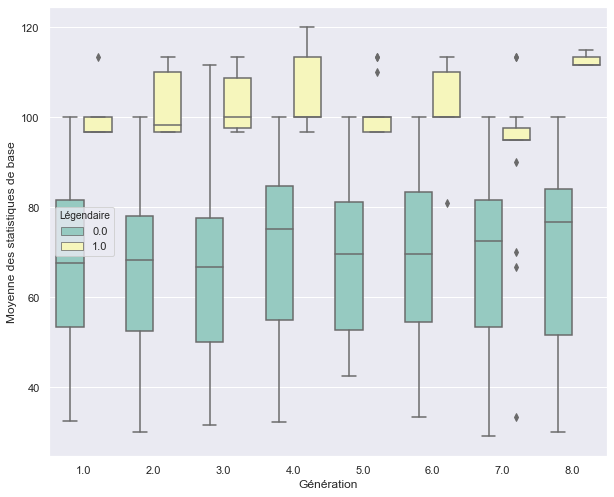

In [15]:
sns.set(rc={'figure.figsize':(10,8.27)})
sns.boxplot(y="Moyenne des statistiques de base",x="Génération",hue="Légendaire",palette="Set3",data=sp)

Cette supériorité dans les bases stats explique principalement la différence entre un pokémon légendaire et un pokémon normal, beaucoup plus que le poid ou la taille qui au final ne sont pas des caractéristiques si significatives pour expliquer le fait d'etre un pokémon légendaire.

La regression logistique suivante nous indique plus précisément que la taille n'est clairement pas significatives et que le poids non plus ne l'est pas, seul la "puissance" sépare réellement les pokémons légendaires des autres

In [16]:
sp["Constante"]=1
y=sp["Légendaire"]
X=sp[["Constante","Poids","Taille","Moyenne des statistiques de base"]]

logit=sm.Logit(y, X)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.111949
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Légendaire   No. Observations:                  890
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                  0.6264
Time:                        16:29:04   Log-Likelihood:                -99.635
converged:                       True   LL-Null:                       -266.71
Covariance Type:            nonrobust   LLR p-value:                 4.048e-72
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Constante                          -24.9479      2.489    -10.022      0.000     -29.827     -20.069
Poids                                0.0020      0.001      1.342      0.180      -0.001       0.005
Taille                              -0.1454      0.203     -0.718      0.473      -0.542       0.252
Moyenne des statistiques de base     0.2603      0.027      9.597      0.000       0.207       0.313
====================================================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Illustrer par ces regression a une seule variable, on peux mieux comprendre pourquoi on a ces résultats en regardant les valeurs des points dans le haut et le bas des graphiques

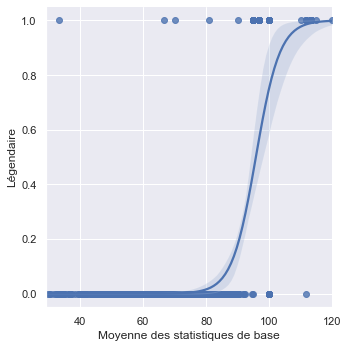

In [178]:
sns.lmplot(x='Moyenne des statistiques de base', y='Légendaire',logistic=True, data=sp)

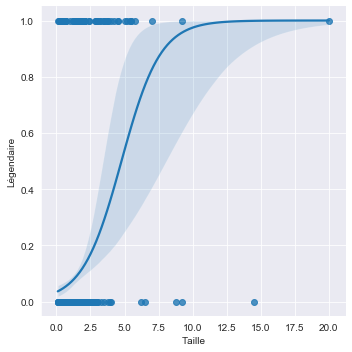

In [7]:
sns.lmplot(x='Taille', y='Légendaire',logistic=True, data=sp)

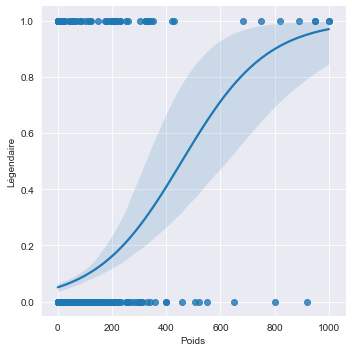

In [4]:
sns.lmplot(x='Poids', y='Légendaire',logistic=True, data=sp)

## Conclusion 

Les pokémons légendaires sont la personification des valeurs extremes, que ce soit en terme de poids, de taille ou de puissance. Pour pouvoir étudier correctement le pokédex nous les retirons pour la suite de l'analyse stratégique ( de plus ils sont interdits en tournois).

En s'interessant plus en profondeur on peut remarquer que meme si ils sont extreme en taille et en poids dans de nombreux cas ce n'est pas ce qui définie le plus ces pokémons, ce qui les défini le mieux c'est leur puissance, les bases stats sont largement meilleurs que pour les autres pokémons.

# 3) Des stats pour la strat

Une des premiere question que je m'était poser était "comment tirer de la valeur du pokédex ?", comment faire de l'argent a partir d'un pokédex ? j'ai imaginer 3 cas:

1) trouver les pokémons qui sont les plus populaire pour pouvoir cibler des produits dériver qui se vendront bien

2) Se lancer sur youtube et faire des videos sur pokémonpour attirer les fans avec un titre acrocheur du style :                    "WOW 100 STATS SUR POKEMONS QUI VONT VOUS FAIRE TOURNER LA TETE, LA NUMERO 39 EST INCROYABLE"

3) Gagner les cash-prize de tournois de combats pokémons

Le probleme avec la premiere proposition est que il me faudrait des données sur la popularité des pokémons et que en plus de ca je pense que les pokémons populaires dépendent surtout de leurs apparence et de la volonter par nintendo de les rendres populaire, pas forcément de variables du pokédex.

La deuxieme est une blague. ("Mr Mime avec un IMC de 32 est obese" aurait été la stat numéro 39)

Reste la 3eme, et la on peux essayer de trouver des éléments qui pourrait etre intéressant pour la stratégie, je ne prétend pas sortir des résultats impressionant , la stratégie dans pokémons est très complexe et il faudrait prendre en compte beaucoup plus de chose que je ne le fait. Mais pour etre le meilleur data-scien... dresseur il faut bien commencer quelque part ! 

## 3.1) Une histoire de base-stats, Y'a t'il un type plus fort qu'un autre ?

Pour commencer je regarde la distribution des bases stats pour l'ensemble des pokémons, histoire de vérifier si c'est équilibré

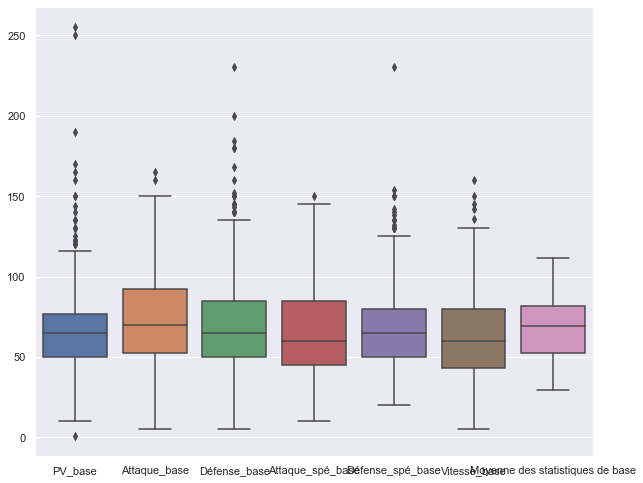

In [20]:
maskpasleg=(sp["Légendaire"]==0)
sppasleg=sp[maskpasleg]
spBaseStat=sppasleg.iloc[:,[10,11,12,13,14,15,17]]
spBaseStat
sns.set(rc={'figure.figsize':(10,8.27)})
sns.boxplot(data=spBaseStat)

On vas ensuite vérifier la distribution des bases stats selon chaque type, pour cela j'ai au début pris la distribution en me basant uniquement sur le premier type (comme on peu le voir en annexe) mais ce résultat ne semblait pas vraiment valable vu la quantité d'information qu'on perdait. Du coup j'ai inclut les doubles types et crée un dataframe pour chaque type type de pokémons, j'ai tout stocker dans un dictionnaire de dataframe dont je me sers pour faire des stats par types correctes

On commence donc par la moyenne de bases stats !

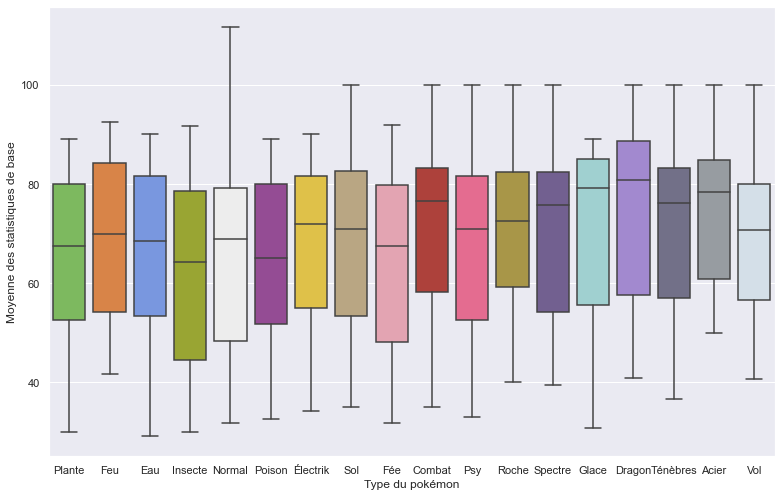

In [21]:
Typesbox = pd.DataFrame()
maskpasleg=(sp["Légendaire"]==0)
sppasleg=sp[maskpasleg]
sptesttype=sppasleg.copy()
Types=['Plante','Feu','Eau','Insecte','Normal','Poison',"Électrik","Sol",'Fée','Combat','Psy','Roche','Spectre','Glace','Dragon','Ténèbres','Acier','Vol']

typesdict = {}
for i in Types:
    mask=((sptesttype["Type1"]==i))|(sptesttype["Type2"]==i)
    typesdict[str(i)]=sptesttype[mask]
    typesdict[str(i)]=typesdict[str(i)]["Moyenne des statistiques de base"]

Typesbox=Typesbox.from_dict(typesdict)
sns.set(rc={'figure.figsize':(13,8.27)})
ax=sns.boxplot(data=Typesbox,palette=pkmn_type_colors)
ax.set(xlabel='Type du pokémon', ylabel='Moyenne des statistiques de base')
plt.show()

On observe que la distribution des base_stats pour les différents types semble équilibré, on remarque tout de même que les pokémons dragon et acier semblent avoir un leger avantage comparer aux autres types et que le type insecte semble legerement inférieur aux autres

## 3.2) Y'a t'il une combinaison de type optimal ? Le role des sensibilité

Les types sont avant tout caractérisé par des faiblesses, (eau contre feu, plante contre eau ...) Pour avoir un jeu plutot équilibré il faudrait que les faiblesses de chaque type se compensent globalement, sans quoi la composition d'équipes serait extremement ennuyante (mettre 6 pokémon avec des faiblesses minimales et voila). La présence de doubles types rend cette question encore plus interressantes car elle élargie énormément le champs des faiblesses possibles.

On peut se poser logiquement les questions suivantes :les types sont-ils équilibré ? y'a t'il un type ideal ? une combinaison de type idéal ? 

Dans le sens Optimal j'entend que la somme des sensibilité est minimal, cette variable nous servira de critere pour décider.
Mais il y a un autre critere a prendre en compte pour vérifier l'équilibrage, la distribution des bases stat selon le type

In [31]:
spBT=sp.sort_values(by=["Somme des sensibilité"])
spBT.head()

,Nom,Nom anglais,Types,Catégorie,Taille,Poids,Talents,Groupe Oeuf,Couleur,Taux de capture,...,Insecte_sensi,Roche_sensi,Spectre_sensi,Dragon_sensi,Ténèbres_sensi,Acier_sensi,Fée_sensi,Somme des sensibilité,Légendaire,Génération
292,Munja,Shedinja,"[Insecte, Spectre]",Pokémon Exuvie,0.8,1.2,Garde Mystik,Minéral,Marron,45.0,...,0.00,2.0,2.0,0.0,2.0,0.00,0.0,10.00,0.0,3.0
888,Zacian,Zacian,"[Fée, Acier]",Pokémon Valeureux,2.8,110.0,Lame Indomptable,Inconnu,Bleu,10.0,...,0.25,0.5,1.0,0.0,0.5,1.00,0.5,13.25,1.0,8.0
707,Trousselin,Klefki,"[Acier, Fée]",Pokémon Trousseau,0.2,3.0,"[Farceur, Magicien]",Minéral,Gris,75.0,...,0.25,0.5,1.0,0.0,0.5,1.00,0.5,13.25,0.0,6.0
303,Mysdibule,Mawile,"[Acier, Fée]",Pokémon Trompeur,0.6,11.5,"[Hyper Cutter, Intimidation, Sans Limite]","[Terrestre, Féerique]",Noir,45.0,...,0.25,0.5,1.0,0.0,0.5,1.00,0.5,13.25,0.0,3.0
801,Magearna,Magearna,"[Acier, Fée]",Pokémon Artificiel,1.0,80.5,Animacœur,Inconnu,Gris,3.0,...,0.25,0.5,1.0,0.0,0.5,1.00,0.5,13.25,1.0,7.0
797,Bamboiselle,Celesteela,"[Acier, Vol]",Pokémon Décollage,9.2,999.9,Boost Chimère,Inconnu,Vert,25.0,...,0.25,1.0,1.0,0.5,1.0,0.50,0.5,13.50,1.0,7.0
823,Corvaillus,Corviknight,"[Vol, Acier]",Pokémon Corbeau,2.2,75.0,"[Pression, Tension, Armure Miroir]",Aérien,Violet,45.0,...,0.25,1.0,1.0,0.5,1.0,0.50,0.5,13.50,0.0,8.0
227,Airmure,Skarmory,"[Acier, Vol]",Pokémon Armoiseau,1.7,50.5,"[Fermeté, Regard Vif, Armurouillée]",Aérien,Gris,25.0,...,0.25,1.0,1.0,0.5,1.0,0.50,0.5,13.50,0.0,2.0
680,Dimoclès,Doublade,"[Acier, Spectre]",Pokémon Glaive,0.8,4.5,Annule Garde,Minéral,Marron,90.0,...,0.25,0.5,2.0,0.5,2.0,0.50,0.5,14.25,0.0,6.0
679,Monorpale,Honedge,"[Acier, Spectre]",Pokémon Glaive,0.8,2.0,Annule Garde,Minéral,Marron,180.0,...,0.25,0.5,2.0,0.5,2.0,0.50,0.5,14.25,0.0,6.0


concernant le meilleur type (en ne comptant pas le pokémon munja qui bénéfécie d'une capacité spécial (seul les attaques super éfficaces l'atteigne) explicant cette somme des sensibilité de seulement 10 ) on trouve que le duo fée/acier est le double type qui garantit  la plus grande résistance aux attaques adverses, suivi par le double type acier vol.

Le type acier est surreprésenter dans le haut du classement , juste avoir le type acier seul place le pokémon dans une meilleur position en terme de sensibilité que toute les autres combinaisons possibles de types (motisma ne compte pas car il a la faculté lévitation qui lui donne un avantage, selon quoi ca combinaison spectre/électrik reste inférieur au seul type acier ) 

In [33]:
spBT.tail(5)

,Nom,Nom anglais,Types,Catégorie,Taille,Poids,Talents,Groupe Oeuf,Couleur,Taux de capture,...,Insecte_sensi,Roche_sensi,Spectre_sensi,Dragon_sensi,Ténèbres_sensi,Acier_sensi,Fée_sensi,Somme des sensibilité,Légendaire,Génération
413,Cheniselle,Wormadam,"[Insecte, Plante]",Pokémon Ver Caché,0.5,6.5,"[Anticipation, Envelocape]",Insectoïde,Gris,45.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,25.0,0.0,4.0
542,Manternel,Leavanny,"[Insecte, Plante]",Pokémon Précepteur,1.2,20.5,"[Essaim, Chlorophylle, Envelocape]",Insectoïde,Jaune,45.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,25.0,0.0,5.0
46,Paras,Paras,"[Insecte, Plante]",Pokémon Champignon,0.3,5.4,"[Pose Spore, Peau Sèche, Moiteur]","[Insectoïde, Végétal]",Rouge,190.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,25.0,0.0,1.0
699,Dragmara,Aurorus,"[Roche, Glace]",Pokémon Toundra,2.7,225.0,"[Peau Gelée, Alerte Neige]",Monstrueux,Bleu,45.0,...,1.0,2.0,1.0,1.0,1.0,4.0,1.0,26.0,0.0,6.0
698,Amagara,Amaura,"[Roche, Glace]",Pokémon Toundra,1.3,25.2,"[Peau Gelée, Alerte Neige]",Monstrueux,Bleu,45.0,...,1.0,2.0,1.0,1.0,1.0,4.0,1.0,26.0,0.0,6.0


Dans le bas du classement on trouve le double type Roche/Glace et Insecte/Plante

Une autre question que l'on peut se poser est : est t'il préférable d'avoir 2 types ou 1 seul ?

In [25]:
mask2types=sp["A 2 types ?"]==1
sp_secondtype=sp[mask2types]
print("\nPour les doubles types on a:\n")
print(sp_secondtype.mean())

mask_untype=sp["A 2 types ?"]==0
sp_unseultype=sp[mask_untype]
print("\n Pour les pokémons qui n'ont qu'un seul type on a:\n")
print(sp_unseultype.mean())


Pour les doubles types on a:

Taille                                1.334989
Poids                                73.366140
Taux de capture                      90.683973
PV_base                              70.376975
Attaque_base                         79.460497
Défense_base                         76.241535
Attaque_spé_base                     73.641084
Défense_spé_base                     72.799097
Vitesse_base                         68.261851
Spécial_base                         73.641084
Moyenne des statistiques de base     73.463544
Somme des statistiques de base      440.781038
A 2 types ?                           1.000000
Normal_sensi                          0.809819
Plante_sensi                          0.975734
Feu_sensi                             1.225734
Eau_sensi                             1.111174
Electrik_sensi                        1.105530
Glace_sensi                           1.371332
Combat_sensi                          1.009594
Poison_sensi                 

En comparant ces deux résultats on trouve que:


les pokemons qui on deux type sont en moyenne meilleurs que les pokémons qui n'en on qu'un, ils ont des moyenne et des sommes de base stat qui sont plus éléver que les 1 seul type : 73 vs 66 pour les moyenne et 440 vs 401 pour les sommes.
Les sommes des résistances sont aussi meilleur en moyenne chez les second type (19,22 vs 18,65)

Ce qui laisse présager que avoir 2 type a un meilleur effet sur la sensibilité que juste en avoir 1, on a gagne donc plus a avoir 2 type que 1 seul

Pour voir si ces interprétation sont fondé on vas regarder en detail la distribution et les ecarts type

In [183]:
print("\nPour les doubles types on a:\n")
stat_untype=sp_unseultype[["Moyenne des statistiques de base","Somme des statistiques de base"]].describe()
stat_deuxtypes=sp_secondtype[["Moyenne des statistiques de base","Somme des statistiques de base"]].describe()
print(stat_untype)
print("\n Pour les pokémons qui n'ont qu'un seul type on a:\n")
print(stat_deuxtypes)


Pour les doubles types on a:

       Moyenne des statistiques de base  Somme des statistiques de base
count                        447.000000                      447.000000
mean                          66.963311                      401.780761
std                           18.211455                      109.268117
min                           29.170000                      175.000000
25%                           51.415000                      308.500000
50%                           67.500000                      405.000000
75%                           81.670000                      490.000000
max                          120.000000                      720.000000

 Pour les pokémons qui n'ont qu'un seul type on a:

       Moyenne des statistiques de base  Somme des statistiques de base
count                        443.000000                      443.000000
mean                          73.463544                      440.781038
std                           18.324578             

On observe les memes variance entre les deux groupes concernant les sommes et moyennes
des bases stat, cepandant on remarque que des le premier quantile les moyenne et les 
sommes sont plus élever chez les bi_types, on a une dominance large

Cepandant dans la somme des sensibilité on a une variance plus élever chez les bi-type
que les 1 seul types, meme si on gagne en moyenne a avoir 2 types on a une plus
grande chance d'avoir des faiblesse et des avantages, les max et min sont plus grand pour
les bi-types et la concentration autour de la moyenne plus faible malgré tout le jeu est globalement bien équilibré, 50% des pokémons on des sommes de sensi comprise entre 18 et 20,5 pour les bitypes et entre 18 et 19,5 pour les uns seuls types

enfin je decide de voir qui sont le pokémons les 15 pokémons les plus puissants en moyenne, on a plus de pokémons avec 2 types que un seul.

In [184]:
maskpasleg=(sp["Légendaire"]==0)
sppasleg=sp[maskpasleg]

spBT=sppasleg.sort_values(by=["Moyenne des statistiques de base"],ascending=False)
spBT.head(15)

,Nom,Nom anglais,Types,Catégorie,Taille,Poids,Talents,Groupe Oeuf,Couleur,Taux de capture,...,Roche_sensi,Spectre_sensi,Dragon_sensi,Ténèbres_sensi,Acier_sensi,Fée_sensi,Somme des sensibilité,Légendaire,Génération,Constante
289,Monaflèmit,Slaking,Normal,Pokémon Fainéant,2.0,130.5,Absentéisme,Terrestre,Marron,45.0,...,1.0,0.0,1.0,1.0,1.0,1.0,18.00,0.0,3.0,1
887,Lanssorien,Dragapult,"[Dragon, Spectre]",Pokémon Furtif,3.0,50.0,"[Corps Sain, Infiltration, Corps Maudit]","[Amorphe, Draconique]",Vert,45.0,...,1.0,2.0,2.0,2.0,1.0,2.0,18.00,0.0,8.0,1
248,Tyranocif,Tyranitar,"[Roche, Ténèbres]",Pokémon Armure,2.0,202.0,"[Sable Volant, Tension]",Monstrueux,Vert,45.0,...,1.0,0.5,1.0,0.5,2.0,2.0,23.00,0.0,2.0,1
373,Drattak,Salamence,"[Dragon, Vol]",Pokémon Dragon,1.5,102.6,"[Intimidation, Impudence]",Draconique,Bleu,45.0,...,2.0,1.0,2.0,1.0,1.0,2.0,20.25,0.0,3.0,1
784,Ékaïser,Kommo-o,"[Dragon, Combat]",Pokémon Écailles,1.6,78.2,"[Pare-Balles, Anti-Bruit, Envelocape]",Draconique,Gris,45.0,...,0.5,1.0,2.0,0.5,1.0,4.0,21.50,0.0,7.0,1
809,Melmetal,Melmetal,Acier,Pokémon Écrou,2.5,800.0,Poing de Fer,Inconnu,Gris,3.0,...,0.5,1.0,0.5,1.0,0.5,0.5,15.00,0.0,7.0,1
376,Métalosse,Metagross,"[Acier, Psy]",Pokémon Pattefer,1.6,550.0,"[Corps Sain, Light Metal]",Minéral,Bleu,3.0,...,0.5,2.0,0.5,2.0,0.5,0.5,16.25,0.0,3.0,1
635,Trioxhydre,Hydreigon,"[Ténèbres, Dragon]",Pokémon Brutal,1.8,160.0,Lévitation,Draconique,Bleu,30.0,...,1.0,0.5,2.0,0.5,1.0,4.0,20.00,0.0,5.0,1
445,Carchacrok,Garchomp,"[Dragon, Sol]",Pokémon Supersonic,1.9,95.0,"[Voile Sable, Peau Dure]","[Draconique, Monstrueux]",Bleu,45.0,...,0.5,1.0,2.0,1.0,1.0,2.0,20.50,0.0,4.0,1
706,Muplodocus,Goodra,Dragon,Pokémon Dragon,2.0,150.5,"[Hydratation, Herbivore, Poisseux]",Draconique,Violet,45.0,...,1.0,1.0,2.0,1.0,1.0,2.0,19.00,0.0,6.0,1


## 3.3) regression des bases stats

J'effectue une régression de la moyenne des statistiques de bases sur le poids, la taille , le taux de capture et le fait d'avoir 2 type pour comprendre ce qui peut determiner la puissance d'un pokémon

In [27]:
sp["Constante"]=1
maskleg=sp["Légendaire"]==0
sp2=sp[maskleg]

y=sp2["Moyenne des statistiques de base"]
X=sp2[["Constante","Poids","Taille","Taux de capture","A 2 types ?"]]
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Moyenne des statistiques de base   R-squared:                       0.563
Model:                                          OLS   Adj. R-squared:                  0.561
Method:                               Least Squares   F-statistic:                     260.1
Date:                              Tue, 07 Apr 2020   Prob (F-statistic):          1.99e-143
Time:                                      17:10:54   Log-Likelihood:                -3083.2
No. Observations:                               811   AIC:                             6176.
Df Residuals:                                   806   BIC:                             6200.
Df Model:                                         4                                         
Covariance Type:                          nonrobust                                         
                      coef    std err          t      P>|t|      [0.02

Dans l'annexe je me suis assuré que les hypotheses de base des mco était vérifier (stationnarité, distribution des résidus ...), le durbin et watson ne nous indique pas d'auto corrélation, et on n'a pas de raison de supposer une forme d'hétérscédasticité particuliere

On trouve donc que une augmentation du poid et de la taille augmente significativement la "puissance" d'un pokémon (en espérance toute chose égale par ailleur) 
Plus le taux de capture est éléver plus le pokémon est faible ( ce qui semble logique, un pokémon facile a capturer doit etre plus faible qu'un pokémon difficile a attraper)
Le fait d'avoir 2 types est significatif au seuil alpha=5% (mais on a quand meme une Pvalue de 3.6%) ce qui indique bien comme on le supposait que les pokémons ayant 2 types sont en moyenne plus puissants.

## Conclusion

On a relever le fait que:

1)certains types sont plus puissants que d'autres (dragon nottament)

2)On a un avantage a avoir 2 types (confirmé par la regression), bien que l'on s'expose a plus de   risque

3)On confirme bien que plus un pokémons est grand,lourd et dur a capturer il est puissant
    

# Annexe

## 1) Poids et taille ? quel liens ?

Je n'ai pas inclus ces résultats dans le travail de base mais je les laisse ici si ca peut intéresser.

On trouvais une distribution conjointe du poids et de la taille qui nous indiquait que la norme pour les pokémons correspondait a des pokémons de moins d'un metre et qui pesait moins de 40kg 

plus le poids augmente et plus la taille est grande, ce rapport est meme plus important chez les pokémons légendaires

la distribution du poid et de la taille ressemble a un khi2 avec une forte skewness a gauche

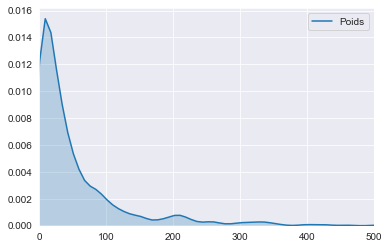

In [22]:
sns.kdeplot(sp["Poids"],shade=True)
plt.xlim(0, 500)
plt.ylim(None, None)
plt.show()

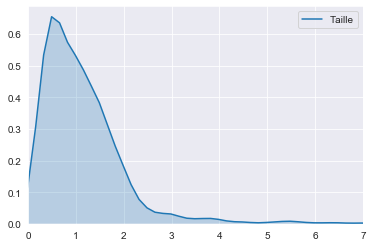

In [23]:
sns.kdeplot(sp["Taille"],shade=True)
plt.xlim(0, 7)
plt.ylim(None, None)
plt.show()

(-0.5, 3)

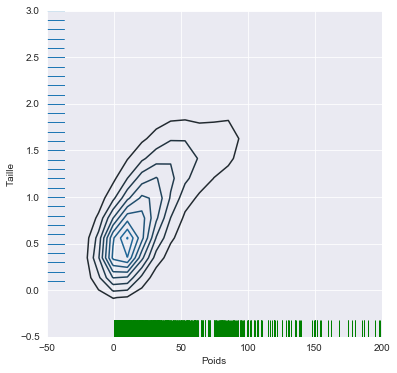

In [25]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(sp["Poids"],sp["Taille"], ax=ax)
sns.rugplot(sp["Poids"], color="g", ax=ax)
sns.rugplot(sp["Taille"], vertical=True, ax=ax);
plt.xlim(-50, 200)
plt.ylim(-0.5, 3)

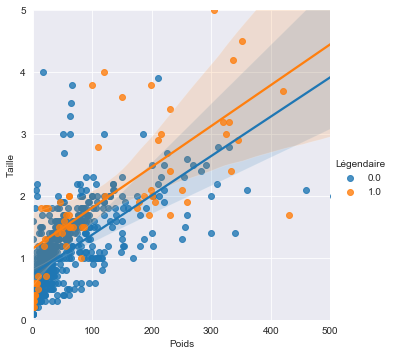

In [24]:
sns.lmplot(x='Poids', y='Taille',hue="Légendaire", data=sp)
plt.xlim(0, 500)
plt.ylim(0, 5)
plt.show()

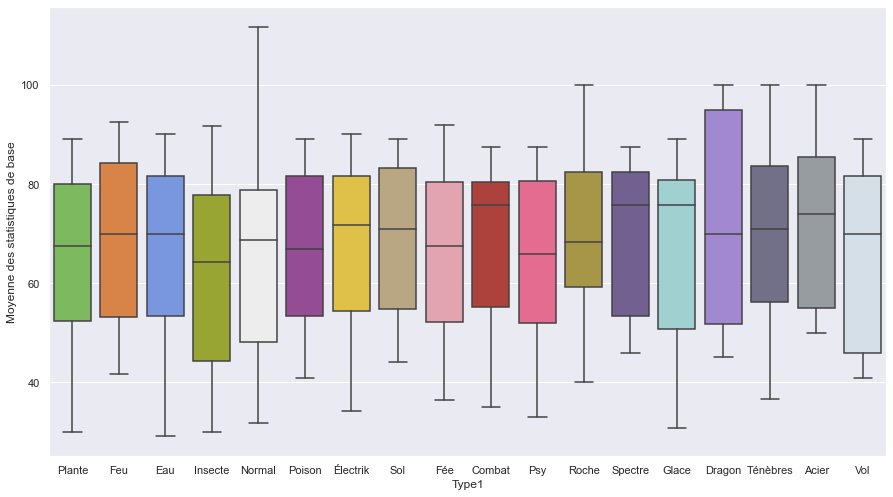

In [23]:
maskpasleg=(sp["Légendaire"]==0)
sppasleg=sp[maskpasleg]
sns.set(rc={'figure.figsize':(15,8.27)})
#sns.violinplot( y="Moyenne des statistiques de base",x="Type1",palette="Set3",data=sppasleg)
sns.boxplot( y="Moyenne des statistiques de base",x="Type1",palette=pkmn_type_colors,data=sppasleg)

## 2) Distribution des résidus de la régression de la moyenne des bases statistiques

Ici j'ai essayer de verifier les hypothese requises pour appliquer les mco, j'ai regarder si la série est stationnaire et j'ai essayer d'avoir une visualisation de la distribution des résidus, comme ce qui est produit de maniere routiniere par sas lors d'une proc reg.

On a une série stationnaire, des résidus qui semblent homosédastiques, bien centré en 0, et qui cole a peu pré a une loi normal selon le qq-plot, la regression semble donc respecter les hypotheses de base

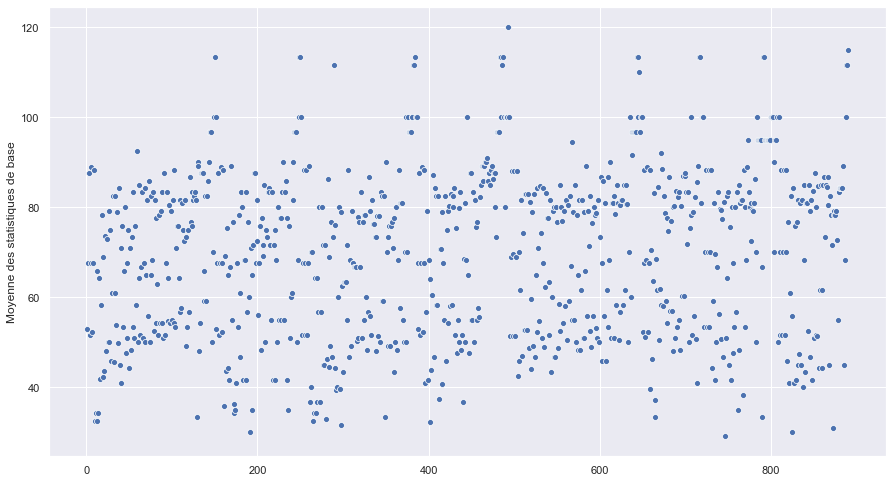

In [26]:
sns.scatterplot(x=sp.index, y="Moyenne des statistiques de base",data=sp)

On a bien une série stationnaire (centré sur sa moyenne et borné par sa variance), qui plus est on peut sur ce graphqhique voir explicitement les pokémons légendaire, systématiquement espacé d'une générarion de pokémon entre eux. 

In [35]:
residuals=results.resid
yhat=results.fittedvalues

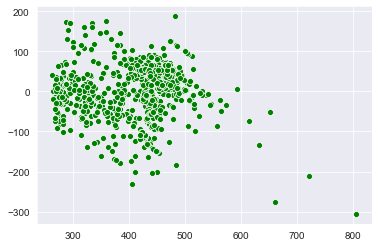

In [12]:
sns.scatterplot(yhat,residuals, color="g")

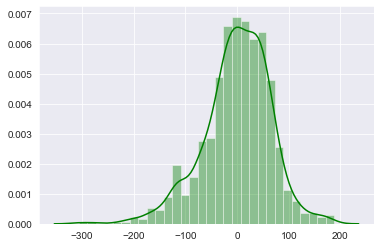

In [13]:
sns.distplot(residuals,color="g")

((array([-3.13669565e+00, -2.86673265e+00, -2.71576348e+00, -2.60912922e+00,
         -2.52583775e+00, -2.45707717e+00, -2.39828060e+00, -2.34676444e+00,
         -2.30081297e+00, -2.25926048e+00, -2.22127755e+00, -2.18625232e+00,
         -2.15372006e+00, -2.12331918e+00, -2.09476266e+00, -2.06781866e+00,
         -2.04229720e+00, -2.01804052e+00, -1.99491617e+00, -1.97281183e+00,
         -1.95163136e+00, -1.93129186e+00, -1.91172130e+00, -1.89285667e+00,
         -1.87464256e+00, -1.85702993e+00, -1.83997520e+00, -1.82343945e+00,
         -1.80738775e+00, -1.79178867e+00, -1.77661379e+00, -1.76183732e+00,
         -1.74743582e+00, -1.73338788e+00, -1.71967391e+00, -1.70627594e+00,
         -1.69317744e+00, -1.68036316e+00, -1.66781901e+00, -1.65553194e+00,
         -1.64348985e+00, -1.63168147e+00, -1.62009632e+00, -1.60872462e+00,
         -1.59755723e+00, -1.58658559e+00, -1.57580168e+00, -1.56519797e+00,
         -1.55476739e+00, -1.54450327e+00, -1.53439933e+00, -1.52444965e+00,

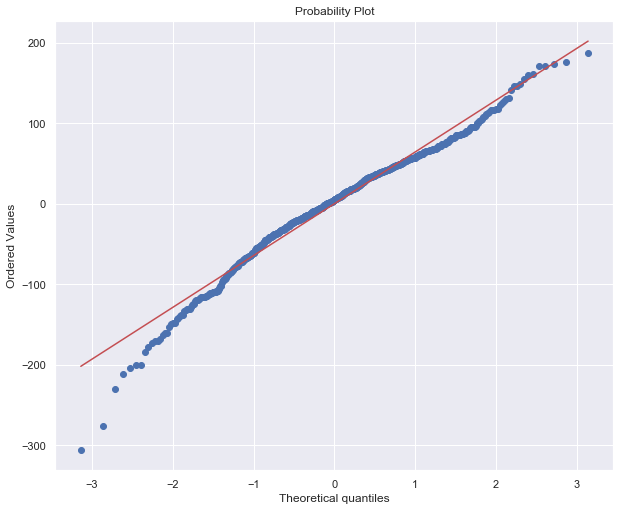

In [62]:
stats.probplot(residuals, plot=sns.mpl.pyplot,)

## 3) Autres graphiques et options 

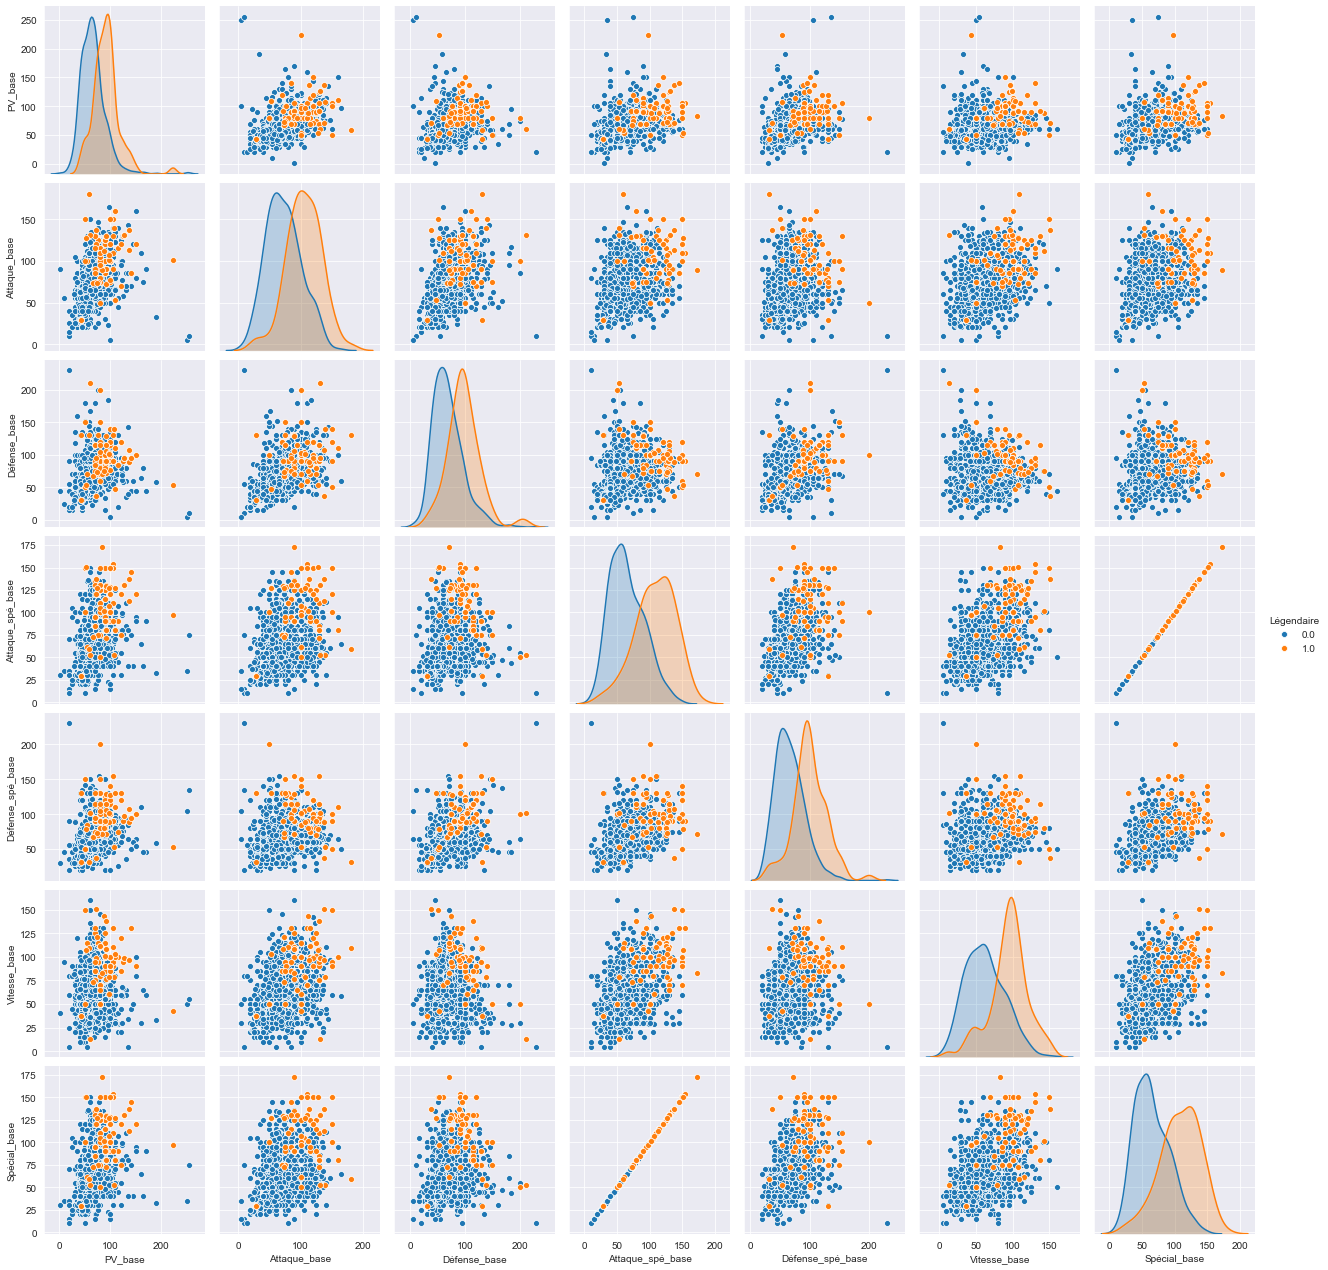

In [39]:
spBaseStat=sp.iloc[:,[10,11,12,13,14,15,16,46]]
sns.pairplot(spBaseStat, hue="Légendaire");

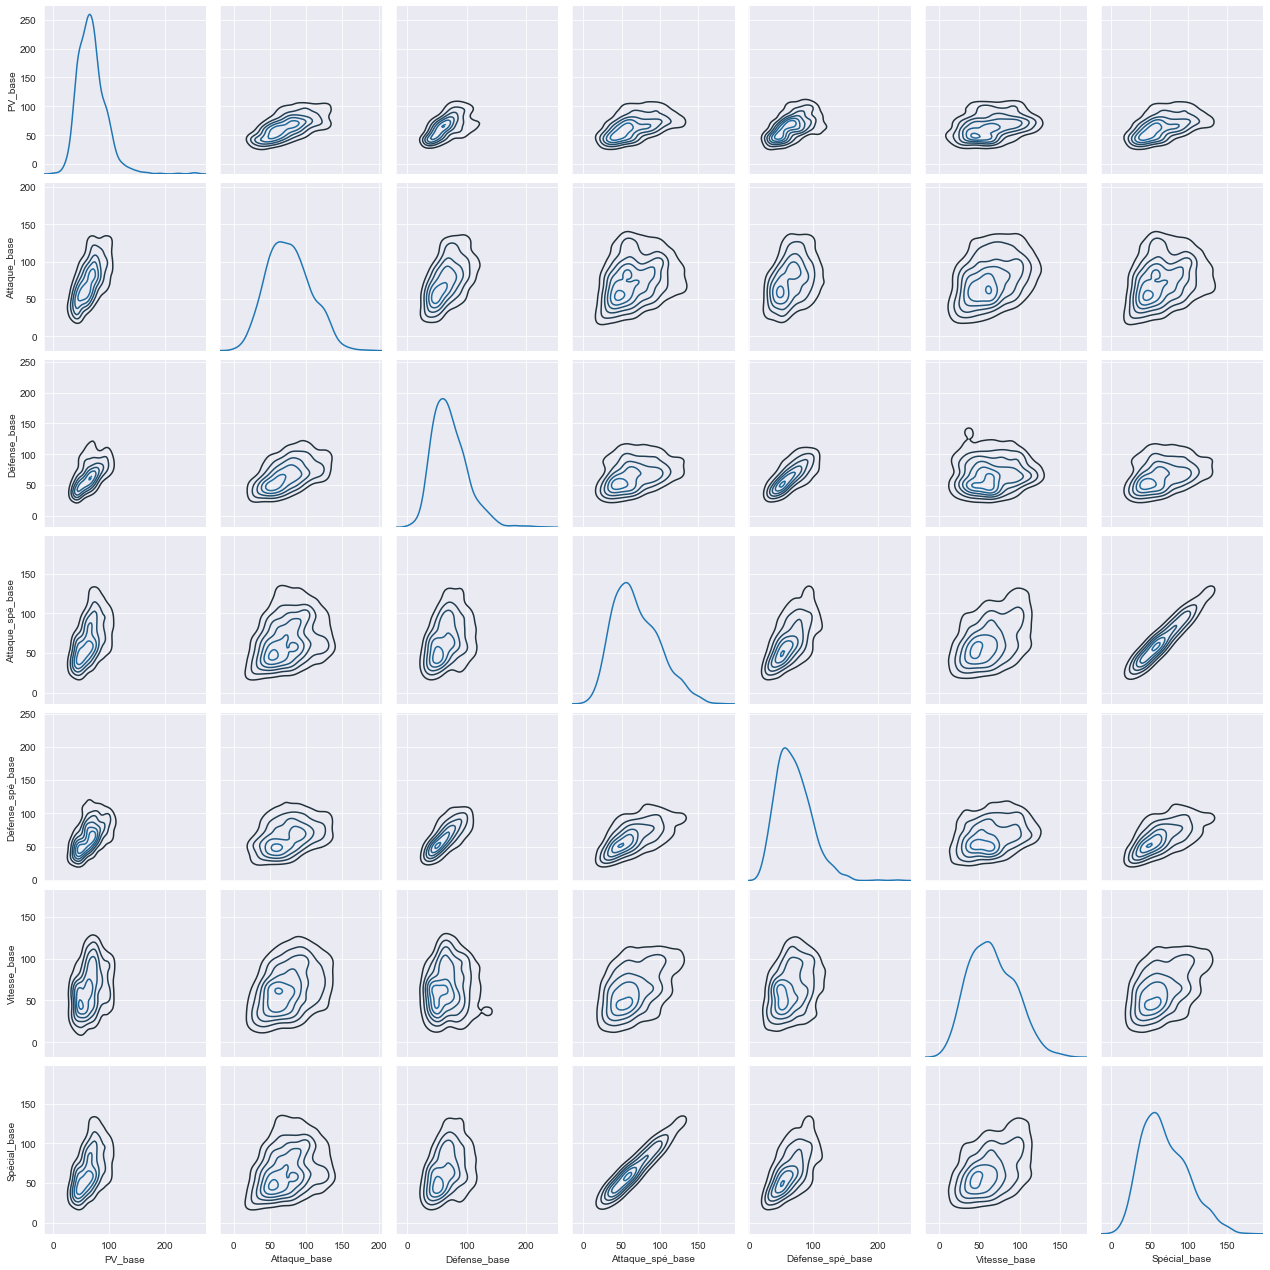

In [40]:
spBaseStat=sp.iloc[:,[10,11,12,13,14,15,16,]]
g=sns.PairGrid(spBaseStat)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

Pas totalement inutile car j'ai pu me rendre compte que attaque_spé_base et spécial_base sont exactement la même chose ...

In [7]:
pkmn_type_colors = {'Plante':'#78C850',
                    'Feu':'#F08030', 
                    'Eau':'#6890F0',  
                    'Insecte':'#A8B820',  # Bug
                    'Normal':'#ededed',  # Normal
                    'Poison':'#A040A0',  # Poison
                    'Électrik':'#F8D030',  # Electric
                    'Sol':'#c2a97a',  # Ground
                    'Fée':'#EE99AC',  # Fairy
                    'Combat':'#C03028',  # Fighting
                    'Psy':'#F85888',  # Psychic
                    'Roche':'#B8A038',  # Rock
                    'Spectre':'#705898',  # Ghost
                    'Glace':'#98D8D8',  # Ice
                    'Dragon':'#9e7ddb',  # Dragon
                    'Ténèbres':'#6E6C8C',
                    'Acier':'#959ca3',
                    'Vol':'#d1dfeb'
                   }


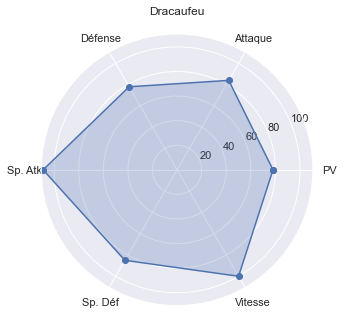

In [58]:
labels=np.array(['PV', 'Attaque', 'Défense', 'Sp. Atk', 'Sp. Déf', 'Vitesse'])
data=sp.loc[6].values[10:16]
nom= sp.loc[6, "Nom"]

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) 
stats=np.concatenate((data,[data[0]]))
angles=np.concatenate((angles,[angles[0]]))


fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, "o-")
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)    
plt.title(nom)
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(6,6)})
plt.show()